In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (16, 10)
plt.rc('font', size=15)



In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(X_train[0])
print(y_train[0])
print(X_train.shape)
print(y_train.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [4]:
X_train = X_train / 255.
X_train = X_train.reshape([-1, 28*28])
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)

X_test = X_test / 255.
X_test = X_test.reshape([-1, 28*28])
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
           .shuffle(buffer_size=len(X_train))\
           .batch(batch_size=128)\
           .prefetch(buffer_size=128)\
           .repeat()

# Test dataset
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))\
            .batch(batch_size=128)\
            .prefetch(buffer_size=128)\
            .repeat()

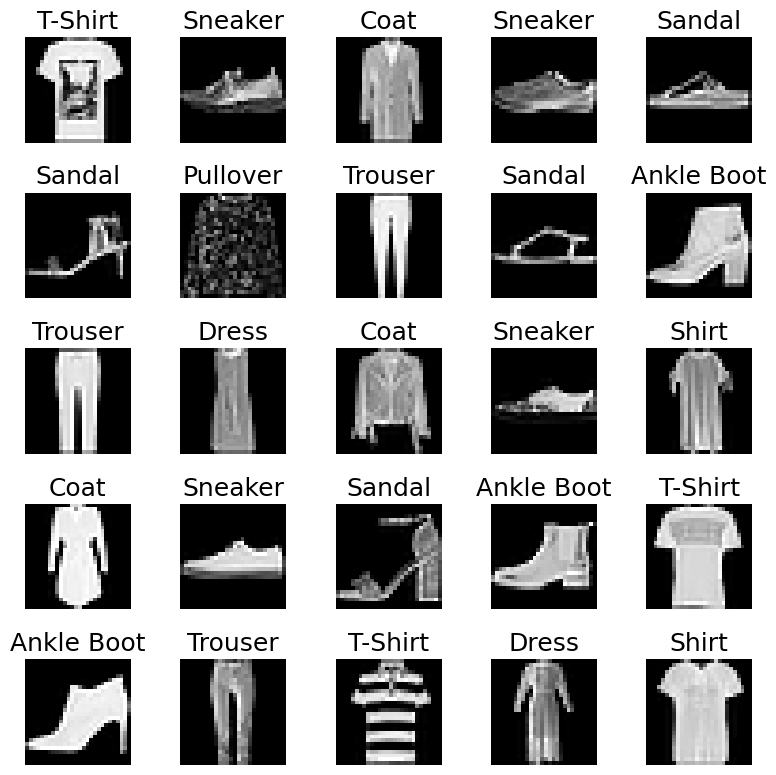

In [6]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(X_train))
    img = X_train[data_idx].reshape([28, 28])
    label = labels_map[y_train[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
model = tf.keras.Sequential(name='nn')

model.add(tf.keras.layers.Dense(256, input_shape=(28*28, )))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 204554 (799.04 KB)
Trainable params: 204042 (797.04 KB)
Non-trainable params: 512 (2.00 KB)
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
model.fit(train_ds, batch_size=128, steps_per_epoch=len(X_train)/128, epochs=10)

Epoch 1/10


468/468 [==============================] - 8s 9ms/step - loss: 0.4512 - accuracy: 0.8371
Epoch 2/10
468/468 [==============================] - 4s 7ms/step - loss: 0.3432 - accuracy: 0.8739
Epoch 3/10
468/468 [==============================] - 3s 7ms/step - loss: 0.3086 - accuracy: 0.8871
Epoch 4/10
468/468 [==============================] - 4s 8ms/step - loss: 0.2867 - accuracy: 0.8935
Epoch 5/10
468/468 [==============================] - 4s 9ms/step - loss: 0.2651 - accuracy: 0.9011
Epoch 6/10
468/468 [==============================] - 3s 7ms/step - loss: 0.2514 - accuracy: 0.9069
Epoch 7/10
468/468 [==============================] - 4s 7ms/step - loss: 0.2323 - accuracy: 0.9137
Epoch 8/10
468/468 [==============================] - 3s 7ms/step - loss: 0.2217 - accuracy: 0.9175
Epoch 9/10
468/468 [==============================] - 3s 7ms/step - loss: 0.2165 - accuracy: 0.9186
Epoch 10/10
468/468 [==============================] - 3s 6ms/step - loss: 0.1994 - accuracy: 0.92

In [12]:
loss, acc = model.evaluate(test_ds, steps=len(X_test)/128)
print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(acc))

#Since test dataset is unseen data from model, 
# so its accuracy and loss may be lower than training one.

 1/78 [..............................] - ETA: 1s - loss: 0.4477 - accuracy: 0.8672

78/78 [==============================] - 0s 4ms/step - loss: 0.4258 - accuracy: 0.8695
test loss is 0.42580968141555786
test accuracy is 0.8694999814033508


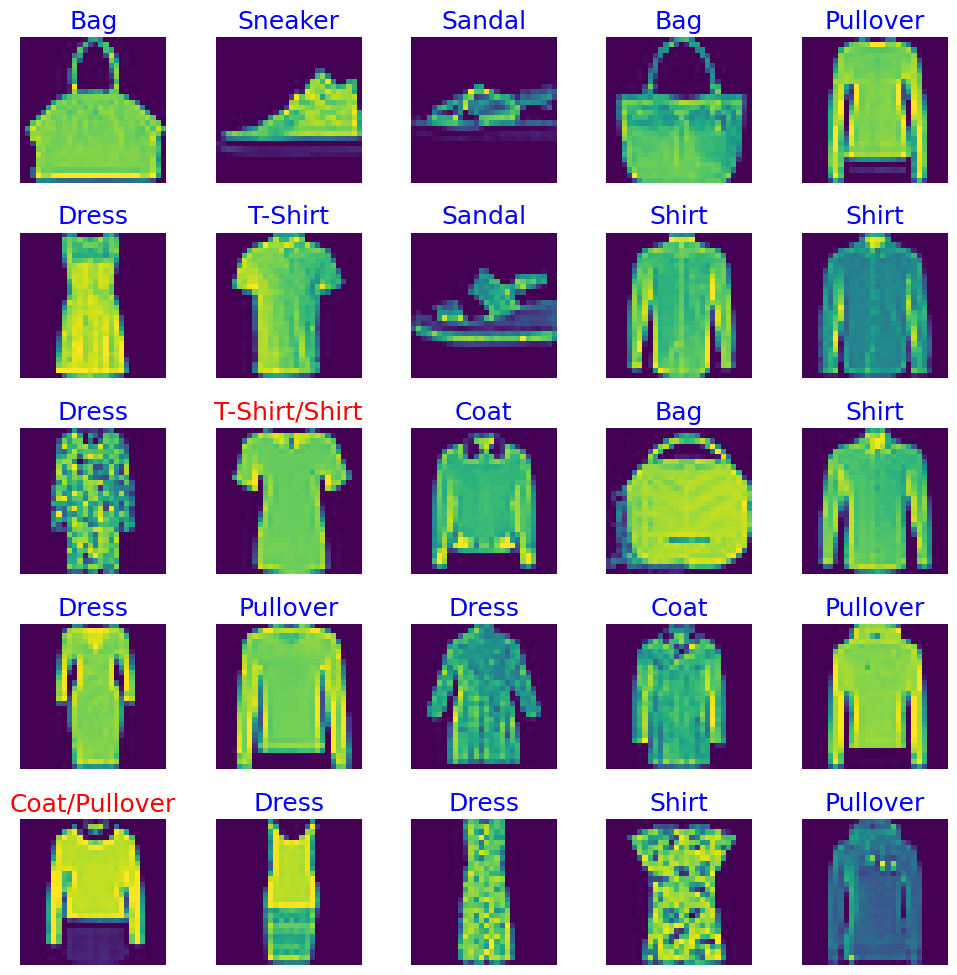

In [14]:
test_batch_size = 25
batch_index = np.random.choice(len(X_test), size=test_batch_size, replace=False)

batch_xs = X_test[batch_index]
batch_ys = y_test[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28))
    p.axis('off')
plt.tight_layout()

- "Fashion_ Modified National Institute of Standards and Technology"
- dataset also has 28x28 pixels, and has 10 labels to classify.
- Actually, tensorflow-keras includes several baseline datasets, including FashionMNIST. It contains 60000 training datasets, we choose 10000 fashion datasets for validation, and 10 labels.

- -------

- As you can see, each pixel value has a range from 0 to 255. and image has 2d array. 

- ------
- Input pipline: 
As you can see from previous post, it requires to convert raw dataset into tensorflow input pipeline. While building input pipeline, we can chain the method with shuffle, prefetch, and repeat. Note that, the purpose of test dataset is to measure the performance. So we don't need to shuffle it.
- ------

- it is important to check the dataset manually. And it is require to visualize sample data. In this section, we'll visualize each label of image in 5x5 matrix.
- -------

- Building Neural network.:-
In this section, we'll build the Multi Layer Perceptron (MLP for short) with 2 Dense Layers. 
- We can add activation function-Softmax
- We added Batch Normalization. Batch Normalization can reduce the effect of Internal Covariate Shift. And it would maintain the information distribution to be normal distribution.
- we can check how many layers implement this model, and how many parameters in this model, etc.
- -----

- we need to compile the model to train.
- our loss function may be categorical crossentropy( calculates the error between the predicted and actual probability distributions)
- mainly-used optimizer is Adam(short for “Adaptive Moment Estimation)(minimize the loss function during the training of neural networks.) with 0.01 learning rate.(smaller learning rates given the noisy estimate of the error gradient)

- ------
- we can train the model with 
-  A batch size of 128 means that the model will process 128 samples at a time during training.
- steps_per_epoch=len(X_train)/128:- This ensures that the model goes through the entire training dataset once per epoch.

- -----
- There are some incorrect prediction. But we can improve your model with hyperparameter tuning (the number of epoch, the number of layers, input nodes, learning rate, etc..)